In [2]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir("C:/Nakul/UCLA Coursework/ML_Project")
new_df = pd.read_csv('restaurants_data', sep='\t')

new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41944 entries, 0 to 41943
Data columns (total 8 columns):
Unnamed: 0       41944 non-null int64
business_id      41944 non-null object
review_count     41944 non-null float64
stars            41944 non-null float64
checkin_count    41944 non-null float64
city             41944 non-null int64
state            41944 non-null int64
categories       41944 non-null object
dtypes: float64(3), int64(3), object(2)
memory usage: 2.6+ MB


<Figure size 432x288 with 0 Axes>

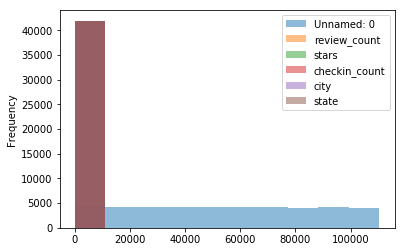

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41944 entries, 0 to 41943
Data columns (total 4 columns):
review_count     41944 non-null float64
checkin_count    41944 non-null float64
city             41944 non-null int64
state            41944 non-null int64
dtypes: float64(2), int64(2)
memory usage: 1.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41944 entries, 0 to 41943
Data columns (total 1 columns):
stars    41944 non-null float64
dtypes: float64(1)
memory usage: 327.8 KB


In [3]:
plt.figure();
new_df.plot.hist(alpha=0.5)
plt.show()

new_df["stars"].value_counts()
new_df.drop(['Unnamed: 0'], axis=1, inplace=True)
X = new_df[['review_count', 'checkin_count', 'city', 'state']]
y = new_df[['stars']]

X.info()
y.info()

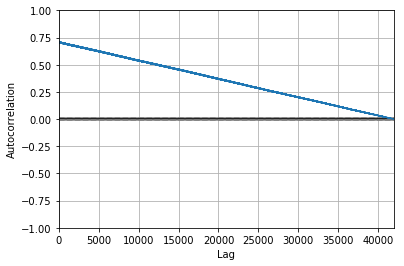

In [4]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(X)
plt.show()


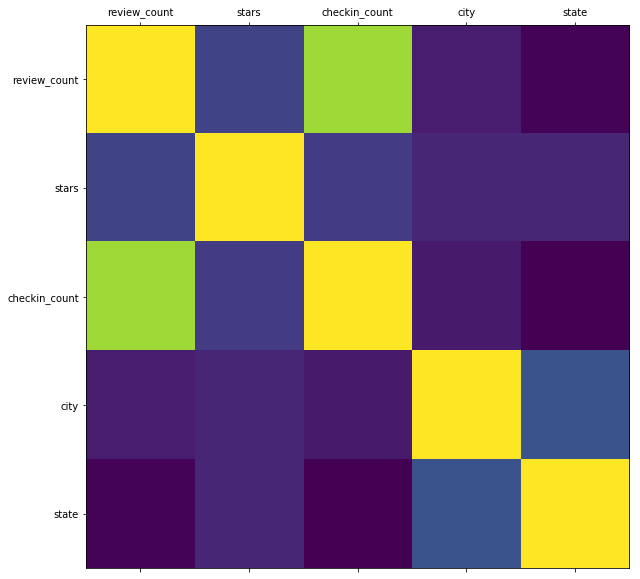

In [5]:
#Correlation plot
corr = new_df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);
plt.show()

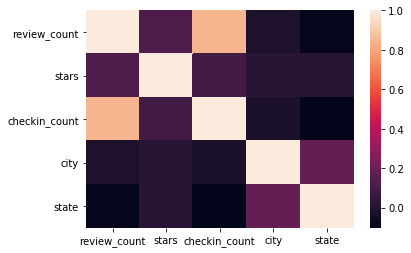

In [6]:
import seaborn as sns
corr = new_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [9]:
from sklearn.linear_model import LinearRegression

import time

t0 = time.clock()

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# for idx, col_name in enumerate(X_train.columns):
#     print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    
intercept = regression_model.intercept_[0]
print("The intercept for our model is {}".format(intercept))

regression_model.score(X_test, y_test)

from sklearn.metrics import mean_squared_error
y_predict = regression_model.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse

import math
math.sqrt(regression_model_mse)

run_time = time.clock() - t0
print('Linear Regression run in %.3f s' % run_time)

The intercept for our model is 3.561505249210109
Linear Regression run in 0.007 s


In [15]:
#Decision Trees
import time
t0 = time.clock()

from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(X_train, y_train)
y_predict = model.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print ('Accuracy score is %.4f' %accuracy_score(y_test, y_predict))
print ('Precision score is %.4f' %precision_score(y_test, y_predict, average='weighted'))
print ('Recall score is %.4f' %recall_score(y_test, y_predict, average='weighted'))

run_time = time.clock() - t0
print('Default Decision Tree run in %.3f s' % run_time)

Accuracy score is 0.5141
Precision score is 0.5140
Recall score is 0.5141
Default Decision Tree run in 0.091 s


In [26]:
#Logistic Regression
t0 = time.clock()

from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV(multi_class='multinomial', tol=1e-2, solver='newton-cg', max_iter=1000)
lr.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = lr.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print ('Accuracy score is %.4f' %accuracy_score(y_test, y_predict))
print ('Precision score is %.4f' %precision_score(y_test, y_predict, average='weighted'))
print ('Recall score is %.4f' %recall_score(y_test, y_predict, average='weighted'))

run_time = time.clock() - t0
print('LR with tol=1e-2 run in %.3f s' % run_time)

C:\Users\nakul\Anaconda3\Anaconda_new\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score is 0.6521
Precision score is 0.4252
Recall score is 0.6521
LR with tol=1e-2 run in 9.466 s


C:\Users\nakul\Anaconda3\Anaconda_new\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
#Support Vector Machine
import time

t0 = time.clock()

from sklearn import svm

clf = svm.SVC()
clf.fit(X, y)

from sklearn.metrics import accuracy_score

y_predict = clf.predict(X_test)

print (type(accuracy_score(y_test, y_predict)))
svm1 =accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print ('Accuracy score is %.4f' %accuracy_score(y_test, y_predict))
print ('Precision score is %.4f' %precision_score(y_test, y_predict, average='weighted'))
print ('Recall score is %.4f' %recall_score(y_test, y_predict, average='weighted'))

run_time = time.clock() - t0
print('SVM run in %.3f s' % run_time)

C:\Users\nakul\Anaconda3\Anaconda_new\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<class 'numpy.float64'>
Accuracy score is 0.6523
Precision score is 0.5966
Recall score is 0.6523
SVM run in 40.701 s


C:\Users\nakul\Anaconda3\Anaconda_new\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


C:\Users\nakul\Anaconda3\Anaconda_new\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


Accuracy score is 0.6519
Recall score is 0.6519
Precision score is 0.5474
Recall score is 0.6519
RFC max-depth=8 and n-estimator=50 run in 8.599 s
Feature ranking:
1. feature 0 (0.471272)
2. feature 1 (0.277335)
3. feature 3 (0.130831)
4. feature 2 (0.120563)


C:\Users\nakul\Anaconda3\Anaconda_new\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


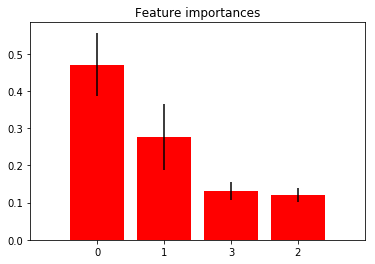

In [25]:
#Random Forrest
t0 = time.clock()

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=500, max_depth=8, random_state=1, oob_score='true')
random_forest.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = random_forest.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print ('Accuracy score is %.4f' %accuracy_score(y_test, y_predict))

print ('Recall score is %.4f' %recall_score(y_test, y_predict, average='weighted'))

#print ('Precision score is %.4f' %precision_score(y_test, y_predict, average=None))
#print ('Recall score is %.4f' %recall_score(y_test, y_predict, average=None))

print ('Precision score is %.4f' %precision_score(y_test, y_predict, average='weighted'))
print ('Recall score is %.4f' %recall_score(y_test, y_predict, average='weighted'))

run_time = time.clock() - t0
print('RFC max-depth=8 and n-estimator=50 run in %.3f s' % run_time)

# print random_forest.feature_importances_

importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [27]:
# K-Nearest neighbours
import time
t0 = time.clock()

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

y_predict = neigh.predict(X_test)
# accuracy_score(y_test, y_predict)

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print ('Accuracy score is %.4f' %accuracy_score(y_test, y_predict))
print ('Precision score is %.4f' %precision_score(y_test, y_predict, average='weighted'))
print ('Recall score is %.4f' %recall_score(y_test, y_predict, average='weighted'))

run_time = time.clock() - t0
print('KNeighb with n=3 run in %.3f s' % run_time)

Accuracy score is 0.5525
Precision score is 0.5224
Recall score is 0.5525
KNeighb with n=3 run in 0.135 s


C:\Users\nakul\Anaconda3\Anaconda_new\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
